# Exploratory Data Analysis on MyVitale's datasets during Data 4 Healthy Recovery Hackathon

## Important notes:
We do not provide the datasets. If you want to use the notebook, please copy the datasets into the ` data ` folder. If you do not have datasets, please ask them from the challenge sponsor.

## Import section

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load datasets

In [2]:
df_antropo1 = pd.read_csv('./data/Antropometrico1.csv.csv', delimiter =',', header=0)
df_antropo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253867 entries, 0 to 253866
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   usuario_id                            253867 non-null  int64  
 1   fecha                                 253867 non-null  object 
 2   antropometria_peso                    253867 non-null  float64
 3   antropometria_imc                     253867 non-null  float64
 4   antropometria_pgraso                  253867 non-null  float64
 5   antropometria_pmuscular               253867 non-null  float64
 6   antropometria_abdomen                 253867 non-null  float64
 7   analisis_corporal_imc                 248276 non-null  float64
 8   analisis_corpora_porc_grasa           249445 non-null  float64
 9   analisis_corpora_kg_grasa             243784 non-null  float64
 10  analisis_corpora_porc_musculo         249366 non-null  float64
 11  

In [3]:
df_antropo2 = pd.read_csv('./data/Antropometrico2.csv.csv', delimiter =',', header=0)
df_antropo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742150 entries, 0 to 742149
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   usuario_id                            742150 non-null  int64  
 1   fecha                                 742150 non-null  object 
 2   antropometria_peso                    742150 non-null  float64
 3   antropometria_imc                     742150 non-null  float64
 4   antropometria_pgraso                  742150 non-null  float64
 5   antropometria_pmuscular               742150 non-null  float64
 6   antropometria_abdomen                 742150 non-null  float64
 7   analisis_corporal_imc                 0 non-null       float64
 8   analisis_corpora_porc_grasa           726605 non-null  float64
 9   analisis_corpora_kg_grasa             719160 non-null  float64
 10  analisis_corpora_porc_musculo         724885 non-null  float64
 11  

In [4]:
df_bodycomp = pd.read_csv('./data/BodyComposition.csv', delimiter =',', header=0)
df_bodycomp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74536 entries, 0 to 74535
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UserId           74536 non-null  int64  
 1   BirthDate        74536 non-null  object 
 2   Height           74536 non-null  int64  
 3   Weight           74536 non-null  float64
 4   BMI              74536 non-null  float64
 5   FatPercent       73244 non-null  float64
 6   MuscleMass       73103 non-null  float64
 7   VisceralFat      66314 non-null  float64
 8   WaterPercent     52642 non-null  float64
 9   BoneMass         52095 non-null  float64
 10  BasalMetabolism  58160 non-null  float64
 11  MetabolicAge     59546 non-null  float64
 12  TestDate         74536 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 7.4+ MB


In [5]:
df_wdata = pd.read_csv('./data/WearableData.csv', delimiter =';', header=0)
df_wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492687 entries, 0 to 492686
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               492687 non-null  int64  
 1   usuario_id       492687 non-null  int64  
 2   idExterno        492687 non-null  int64  
 3   fecha            492687 non-null  object 
 4   app              492687 non-null  object 
 5   actividad        492687 non-null  object 
 6   distancia        492687 non-null  int64  
 7   duracion         492687 non-null  int64  
 8   calorias         492687 non-null  int64  
 9   puntos           492687 non-null  int64  
 10  pasos            492687 non-null  int64  
 11  velocidad        492687 non-null  float64
 12  datosOriginales  492687 non-null  object 
dtypes: float64(1), int64(8), object(4)
memory usage: 48.9+ MB


### Notes:
There are 4 different datasets. Some of them are in English, while the others in Spanish. There is no  information about the method of measurement, the approach of data collection and data cleaning or the used units. This last one is a common problem in data science. The data scientist has to figure out what is the proper measurement and unit. It is easy when the dataset meets with one of the International Systems of Units. However, sometimes there is no obviously, the metric or the SI system is a good one. Using different languages can make a language-barrier. Online translating tools can help to decrease the problem, but the real solution is using a unified labeling language that can export the data with different language headers, labels, tags or annotations. The datasets use different delimiters like ` , ` and ` ; `. Pandas use colon as default delimiter. An automated data process can throw an error due to the different limiter. However it can handle with ` try ` function, but using try in a situation like this is really far away from an elegant coding style.

In [6]:
# Some variables that helps to filter the user_ids
userid_antropo1 = list(df_antropo1['usuario_id'])
userid_antropo2 = list(df_antropo2['usuario_id'])
userid_bodycomp = list(df_bodycomp['UserId'])
userid_wdata = list(df_wdata['usuario_id'])
userid_total = userid_antropo1 + userid_antropo2 + userid_bodycomp + userid_wdata

In [7]:
print('Count of userid in df_antropo1: {}'.format(len(userid_antropo1)))
print('Count of userid in df_antropo2: {}'.format(len(userid_antropo2)))
print('Count of userid in df_bodycomp: {}'.format(len(userid_bodycomp)))
print('Count of userid in df_wdata:    {}'.format(len(userid_wdata)))
print('Total count of userid:          {}'.format(len(userid_antropo1) + len(userid_antropo1) + len(userid_bodycomp) + len(userid_wdata)))
print('--------------------------------')
print('Unique userids in df_antropo1:  {}'.format(len(set(userid_antropo1))))
print('Unique userids in df_antropo2:  {}'.format(len(set(userid_antropo2))))
print('Unique userids in df_bodycomp:  {}'.format(len(set(userid_bodycomp))))
print('Unique userids in df_wdata:     {}'.format(len(set(userid_wdata))))
print('--------------------------------')
print('Total unique userids:          {}'.format(len(set(userid_total))))

Count of userid in df_antropo1: 253867
Count of userid in df_antropo2: 742150
Count of userid in df_bodycomp: 74536
Count of userid in df_wdata:    492687
Total count of userid:          1074957
--------------------------------
Unique userids in df_antropo1:  103726
Unique userids in df_antropo2:  339278
Unique userids in df_bodycomp:  48222
Unique userids in df_wdata:     9890
--------------------------------
Total unique userids:          420857


## Sampling from datasets

In [8]:
df_antropo1.sample(3)

,usuario_id,fecha,antropometria_peso,antropometria_imc,antropometria_pgraso,antropometria_pmuscular,antropometria_abdomen,analisis_corporal_imc,analisis_corpora_porc_grasa,analisis_corpora_kg_grasa,analisis_corpora_porc_musculo,analisis_corpora_perimetro_abdominal,analisis_corpora_porc_grasa_visceral,analisis_corpora_imm_absoluta,analisis_corpora_peso_kg_musculo,id
10529,1091093,2017-08-30 09:51:08,75.0,0.0,35.0,27.0,0.0,24.4,35.0,19.25,27.0,0.0,0.0,12.0,14.85,10663
88629,441035,2018-08-13 06:20:36,57.3,25.1,36.7,26.4,88.0,25.1,36.7,21.03,26.4,88.0,9.0,11.6,15.13,88791
124149,376495,2019-01-29 19:50:29,0.0,0.0,0.0,0.0,0.0,27.7,42.6,29.86,24.0,87.2,10.0,6.7,16.82,124311


In [9]:
df_antropo2.sample(3)

,usuario_id,fecha,antropometria_peso,antropometria_imc,antropometria_pgraso,antropometria_pmuscular,antropometria_abdomen,analisis_corporal_imc,analisis_corpora_porc_grasa,analisis_corpora_kg_grasa,analisis_corpora_porc_musculo,analisis_corpora_perimetro_abdominal,analisis_corpora_porc_grasa_visceral,analisis_corpora_imm_absoluta,analisis_corpora_peso_kg_musculo,id
418807,698082,2019-02-23 08:33:12,76.8,28.2,30.1,40.0,96.0,NaN,30.1,23.12,40.0,96.0,9.0,11.3,30.72,985050
611088,1512307,2019-10-31 18:12:01,58.5,25.0,35.0,28.0,74.0,NaN,35.0,20.48,28.0,74.0,5.0,7.0,16.38,1177335
548228,996430,2019-08-12 16:30:30,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1114473


In [10]:
df_bodycomp.sample(3)

,UserId,BirthDate,Height,Weight,BMI,FatPercent,MuscleMass,VisceralFat,WaterPercent,BoneMass,BasalMetabolism,MetabolicAge,TestDate
1987,2555161,1987-05-19,172,70.6,23.9,16.8,55.8,4.0,41.2,2.9,1707.0,25.0,2019-12-09 12:48:38
74395,3193371,1998-02-24,158,66.8,26.8,32.0,43.1,3.0,32.2,2.3,1416.0,33.0,2021-06-07 18:56:12
6508,2724542,1971-09-18,160,75.0,29.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-06-10 01:19:21


In [11]:
df_wdata.sample(3)

,id,usuario_id,idExterno,fecha,app,actividad,distancia,duracion,calorias,puntos,pasos,velocidad,datosOriginales
158718,158734,1843237,15313814,2019-09-04 06:38:40,GoogleFit,actividad diaria,4147,86400,397,40,7370,2.58,"{""id"":""15313814"",""source"":""GoogleFit"",""sport_t..."
133031,133047,1444451,13612314,2019-05-24 00:00:00,Garmin,actividad diaria,16744,86400,1069,107,22136,3.14,"{""id"":""13612314"",""source"":""Garmin"",""sport_type..."
9170,9186,1352940,8931388,2018-07-02 00:00:00,FitBit,actividad diaria,3690,86400,510,51,4746,2.07,"{""id"":""8931388"",""source"":""FitBit"",""sport_type""..."


## Describing datasets

In [12]:
df_antropo1.describe()

,usuario_id,antropometria_peso,antropometria_imc,antropometria_pgraso,antropometria_pmuscular,antropometria_abdomen,analisis_corporal_imc,analisis_corpora_porc_grasa,analisis_corpora_kg_grasa,analisis_corpora_porc_musculo,analisis_corpora_perimetro_abdominal,analisis_corpora_porc_grasa_visceral,analisis_corpora_imm_absoluta,analisis_corpora_peso_kg_musculo,id
count,2.538670e+05,253867.000000,253867.000000,253867.000000,253867.000000,253867.000000,248276.000000,249445.000000,2.437840e+05,249366.000000,249102.000000,249259.000000,247720.000000,237722.000000,253867.000000
mean,1.246639e+06,53.793276,325.657055,24.527387,12.756851,41.689003,475.604449,34.599360,5.577102e+01,17.227353,53.918404,4.678112,101.853306,12.143826,127092.237069
std,7.014907e+05,70.156769,11084.013685,2205.306295,19.253415,1810.758116,12265.037987,2724.676364,9.991574e+03,21.783216,1840.219907,15.521851,3996.521513,23.658356,73293.589582
min,4.900000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
25%,7.242570e+05,0.000000,0.000000,0.000000,0.000000,0.000000,20.900000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,63626.500000
50%,1.060181e+06,64.500000,22.800000,0.000000,0.000000,0.000000,24.500000,25.000000,1.616330e+01,23.500000,71.000000,3.000000,6.300000,14.490000,127095.000000
75%,1.761026e+06,75.000000,26.800000,32.800000,26.800000,85.000000,28.000000,36.200000,2.482000e+01,29.100000,90.000000,8.000000,9.500000,20.090000,190565.500000
max,3.193788e+06,9493.800000,940000.000000,555555.000000,3536.000000,899512.000000,940000.000000,555555.000000,2.466664e+06,3536.000000,899512.000000,5110.000000,720000.000000,2817.570000,254032.000000


In [13]:
df_antropo2.describe()

,usuario_id,antropometria_peso,antropometria_imc,antropometria_pgraso,antropometria_pmuscular,antropometria_abdomen,analisis_corporal_imc,analisis_corpora_porc_grasa,analisis_corpora_kg_grasa,analisis_corpora_porc_musculo,analisis_corpora_perimetro_abdominal,analisis_corpora_porc_grasa_visceral,analisis_corpora_imm_absoluta,analisis_corpora_peso_kg_musculo,id
count,7.421500e+05,742150.000000,7.421500e+05,742150.000000,742150.000000,742150.000000,0.0,726605.000000,719160.000000,724885.000000,725872.000000,726311.000000,725205.000000,704744.000000,7.421500e+05
mean,1.303484e+06,50.875039,5.897234e+01,21.366875,20.498655,56.570785,NaN,25.748257,18.328720,24.726874,68.125207,5.548537,124.706695,17.520565,7.978935e+05
std,6.885079e+05,878.381491,5.270941e+03,24.117514,26.209336,141.747675,NaN,24.629430,270.142278,25.815356,145.976642,18.050246,4390.221771,244.969302,4.282172e+05
min,4.090000e+02,0.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+01
25%,7.882948e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN,18.500000,11.860000,21.800000,69.000000,2.000000,5.400000,12.360000,7.517622e+05
50%,1.091470e+06,60.500000,2.270000e+01,24.600000,25.600000,76.000000,NaN,28.000000,18.150000,27.400000,80.000000,5.000000,8.600000,17.262700,9.373105e+05
75%,1.809791e+06,72.800000,2.590000e+01,34.100000,33.500000,87.000000,NaN,35.500000,24.060000,35.200000,89.000000,8.000000,10.500000,26.460000,1.122857e+06
max,3.194069e+06,754801.000000,1.010000e+06,4402.000000,4512.000000,106102.000000,NaN,4402.000000,227949.900000,4512.000000,106102.000000,14108.000000,511100.000000,204551.070000,1.308396e+06


In [14]:
df_bodycomp.describe()

,UserId,Height,Weight,BMI,FatPercent,MuscleMass,VisceralFat,WaterPercent,BoneMass,BasalMetabolism,MetabolicAge
count,7.453600e+04,74536.000000,74536.000000,74536.000000,73244.000000,7.310300e+04,66314.000000,52642.000000,5.209500e+04,5.816000e+04,5.954600e+04
mean,2.333563e+06,170.142683,67.663726,23.317404,24.283667,4.125160e+04,7.646022,12.967757,6.121415e+02,1.075814e+03,6.571605e+02
std,8.647197e+05,242.147249,19.216076,6.346074,26.843286,1.114417e+07,478.846730,27.762173,4.918482e+04,2.349299e+04,1.090399e+05
min,2.330000e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.856766e+06,160.000000,58.300000,20.633333,16.000000,2.280000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.671830e+06,168.000000,67.600000,23.466667,25.600000,2.920000e+01,4.000000,0.000000,0.000000e+00,1.254000e+03,2.400000e+01
75%,3.056410e+06,175.000000,78.000000,26.600000,33.700000,3.970000e+01,7.000000,30.800000,2.400000e+00,1.594000e+03,4.100000e+01
max,3.196160e+06,32767.000000,167.000000,49.866667,3302.000000,3.013112e+09,111882.000000,1639.000000,3.969297e+06,4.000004e+06,1.881485e+07


In [15]:
df_wdata.describe()

,id,usuario_id,idExterno,distancia,duracion,calorias,puntos,pasos,velocidad
count,492687.000000,4.926870e+05,4.926870e+05,492687.000000,4.926870e+05,492687.000000,492687.000000,492687.000000,492687.000000
mean,271428.785458,2.091777e+06,8.533182e+06,3426.664761,4.270628e+04,971.292772,718.035450,7012.824682,1.609070
std,172432.292522,6.348816e+05,7.453189e+06,7457.994056,4.619276e+04,994.637165,2873.148321,9036.522289,8.825641
min,1.000000,2.000000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-198856.000000,0.000000
25%,123187.500000,1.752193e+06,0.000000e+00,2.000000,0.000000e+00,153.000000,0.000000,1005.000000,0.000000
50%,246361.000000,2.056522e+06,1.182407e+07,68.000000,8.962000e+03,612.000000,20.000000,5525.000000,0.000000
75%,445263.500000,2.555089e+06,1.529160e+07,5038.000000,8.640000e+04,1654.000000,73.000000,10202.000000,1.710000
max,571574.000000,3.196114e+06,1.890536e+07,300000.000000,5.199092e+06,23724.000000,32601.000000,400000.000000,999.999000


In [16]:
def count_uniques(df, name):
    columns = list(df.columns.str.strip().values)
    print('\n{}'.format(name))
    for column in columns:
        uniques = df[column].nunique()
        print('There are {} unique value(s) in column {}'.format(uniques, column))

In [17]:
count_uniques(df_antropo1, 'Antropometrico1')
count_uniques(df_antropo2, 'Antropometrico2')
count_uniques(df_bodycomp, 'BodyComposition')
count_uniques(df_wdata, 'WearableData')


Antropometrico1
There are 103726 unique value(s) in column usuario_id
There are 252712 unique value(s) in column fecha
There are 1956 unique value(s) in column antropometria_peso
There are 779 unique value(s) in column antropometria_imc
There are 837 unique value(s) in column antropometria_pgraso
There are 732 unique value(s) in column antropometria_pmuscular
There are 895 unique value(s) in column antropometria_abdomen
There are 813 unique value(s) in column analisis_corporal_imc
There are 871 unique value(s) in column analisis_corpora_porc_grasa
There are 16965 unique value(s) in column analisis_corpora_kg_grasa
There are 766 unique value(s) in column analisis_corpora_porc_musculo
There are 890 unique value(s) in column analisis_corpora_perimetro_abdominal
There are 167 unique value(s) in column analisis_corpora_porc_grasa_visceral
There are 496 unique value(s) in column analisis_corpora_imm_absoluta
There are 13067 unique value(s) in column analisis_corpora_peso_kg_musculo
There ar

In [18]:
def count_nan(df, name):
    columns = list(df.columns.str.strip().values)
    print('\n{} (len : {})'.format(name, len(df)))
    for column in columns:
        uniques = df[column].isna().sum()
        print('There are {} NaN value(s) in column {}'.format(uniques, column))

In [19]:
count_nan(df_antropo1, 'Antropometrico1')
count_nan(df_antropo2, 'Antropometrico2')
count_nan(df_bodycomp, 'BodyComposition')
count_nan(df_wdata, 'WearableData')


Antropometrico1 (len : 253867)
There are 0 NaN value(s) in column usuario_id
There are 0 NaN value(s) in column fecha
There are 0 NaN value(s) in column antropometria_peso
There are 0 NaN value(s) in column antropometria_imc
There are 0 NaN value(s) in column antropometria_pgraso
There are 0 NaN value(s) in column antropometria_pmuscular
There are 0 NaN value(s) in column antropometria_abdomen
There are 5591 NaN value(s) in column analisis_corporal_imc
There are 4422 NaN value(s) in column analisis_corpora_porc_grasa
There are 10083 NaN value(s) in column analisis_corpora_kg_grasa
There are 4501 NaN value(s) in column analisis_corpora_porc_musculo
There are 4765 NaN value(s) in column analisis_corpora_perimetro_abdominal
There are 4608 NaN value(s) in column analisis_corpora_porc_grasa_visceral
There are 6147 NaN value(s) in column analisis_corpora_imm_absoluta
There are 16145 NaN value(s) in column analisis_corpora_peso_kg_musculo
There are 0 NaN value(s) in column id

Antropometrico

### Notes:
There are a lot of NaN values in datasets. A good labeling system can filter these anomalies.

In [20]:
def plot_hist(df, list_columns, name):
    print('\n{}'.format(name))
    for column in list_columns:
        if all(df[column].isna()) is False:
            plt.hist(df[column], bins = 10, range = (df[column].min(), df[column].max()),
                     color = 'navy')
            plt.title(column)
            plt.show()

In [21]:
columns_antropo1 = ['antropometria_peso', 'antropometria_imc', 'antropometria_pgraso',
                    'antropometria_pmuscular','antropometria_abdomen', 'analisis_corporal_imc',
                    'analisis_corpora_porc_grasa', 'analisis_corpora_kg_grasa',
                    'analisis_corpora_porc_musculo','analisis_corpora_perimetro_abdominal',
                    'analisis_corpora_porc_grasa_visceral', 'analisis_corpora_imm_absoluta',
                    'analisis_corpora_peso_kg_musculo']
columns_antropo2 = ['antropometria_peso', 'antropometria_imc', 'antropometria_pgraso',
                    'antropometria_pmuscular','antropometria_abdomen', 'analisis_corporal_imc',
                    'analisis_corpora_porc_grasa', 'analisis_corpora_kg_grasa',
                    'analisis_corpora_porc_musculo','analisis_corpora_perimetro_abdominal',
                    'analisis_corpora_porc_grasa_visceral', 'analisis_corpora_imm_absoluta',
                    'analisis_corpora_peso_kg_musculo']
columns_bodycomp = ['Height', 'Weight', 'BMI', 'FatPercent','MuscleMass', 'VisceralFat',
                    'WaterPercent', 'BoneMass', 'BasalMetabolism', 'MetabolicAge']
columns_wdata = ['distancia', 'duracion', 'calorias', 'puntos', 'pasos', 'velocidad']


Antropometrico1


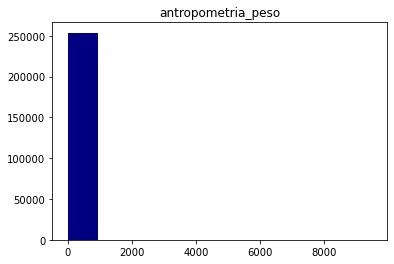

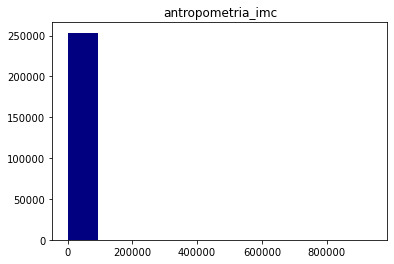

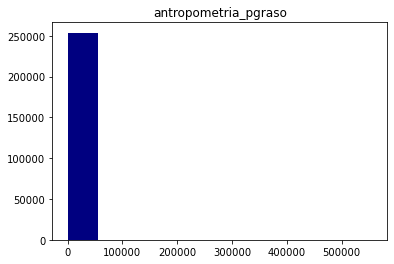

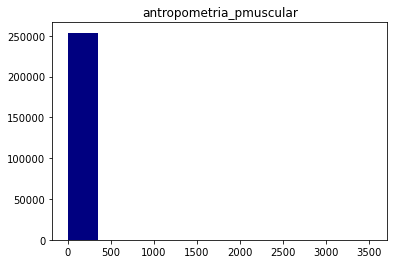

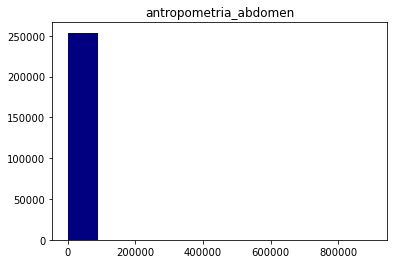

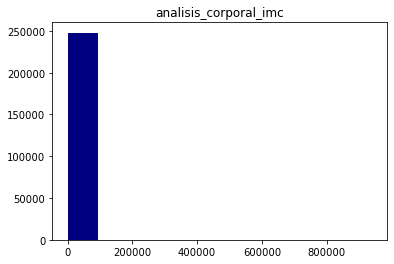

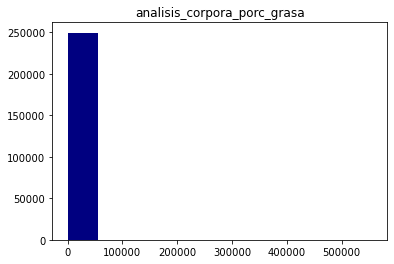

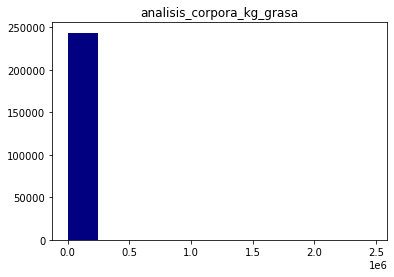

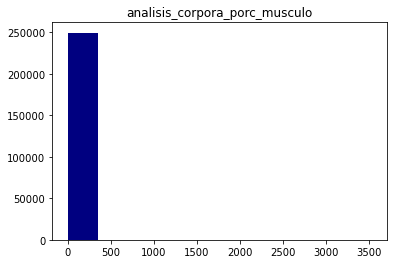

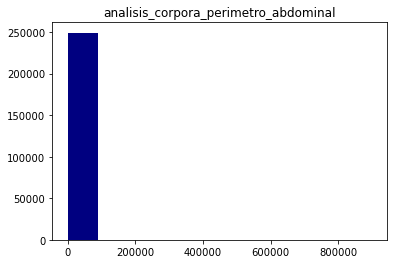

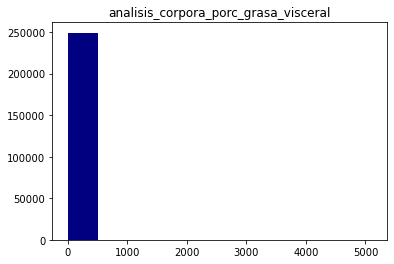

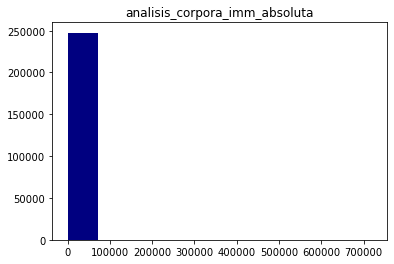

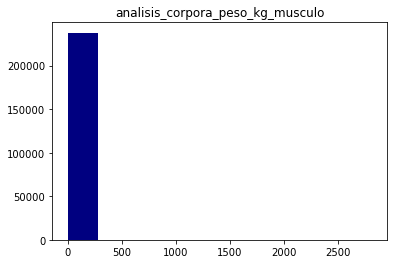


Antropometrico2


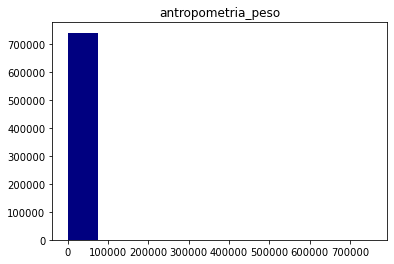

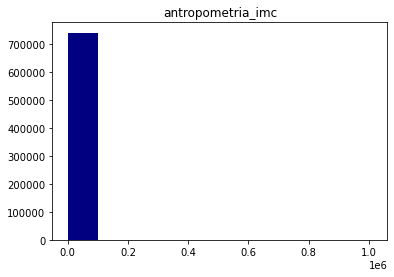

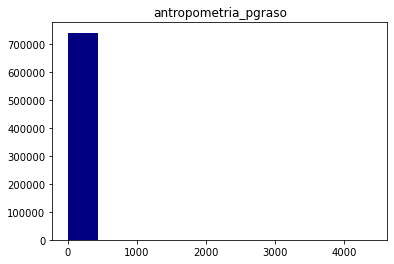

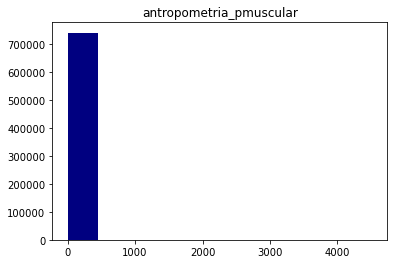

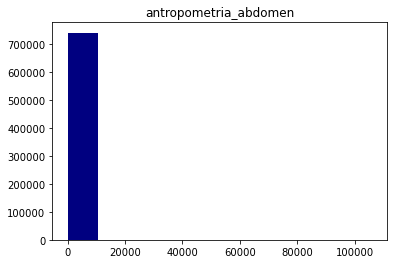

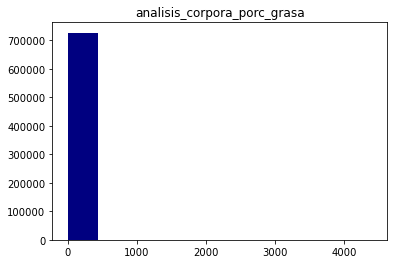

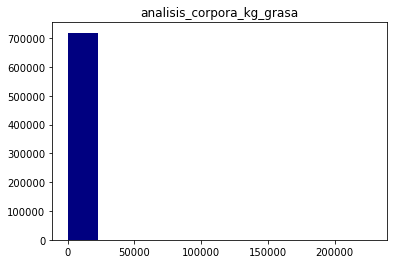

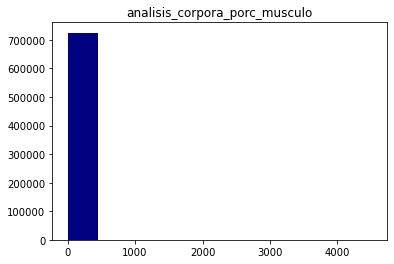

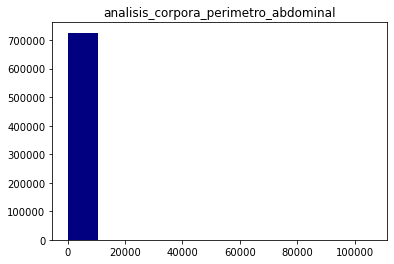

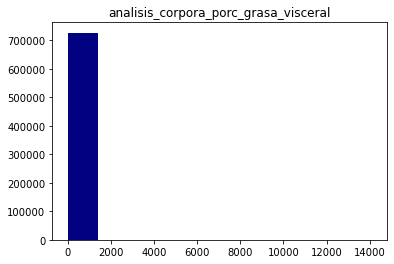

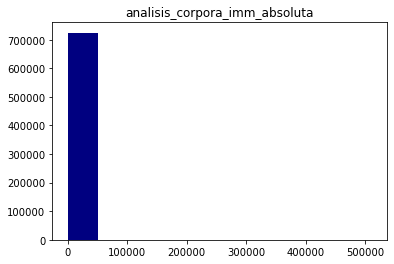

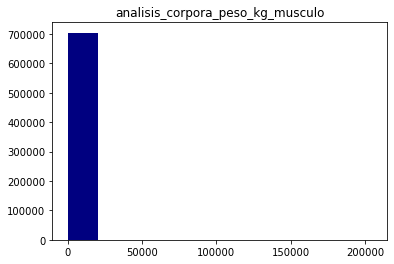


BodyComposition


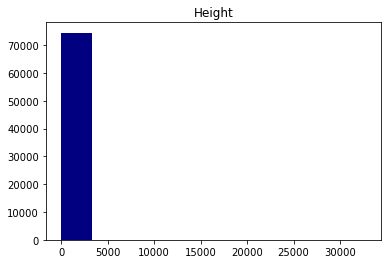

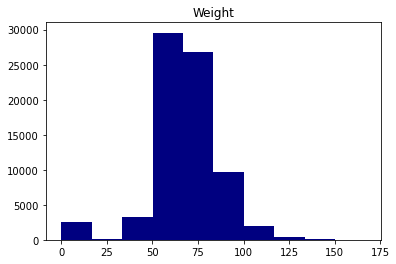

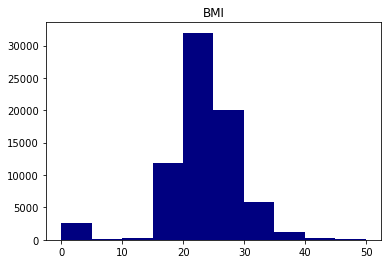

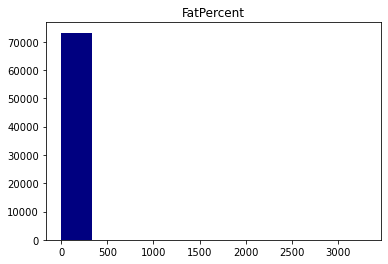

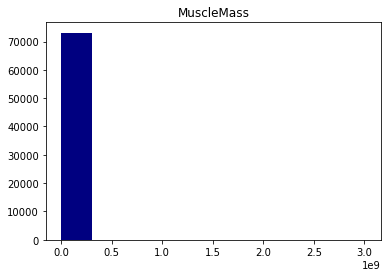

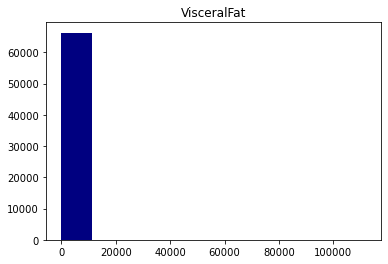

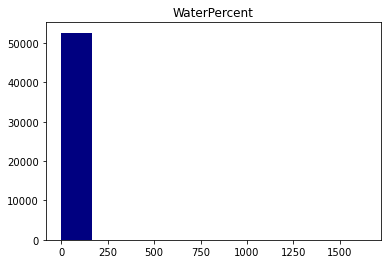

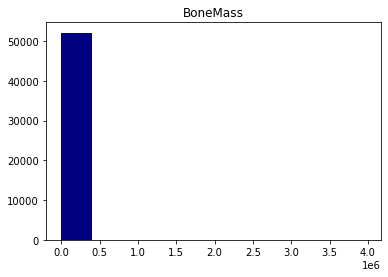

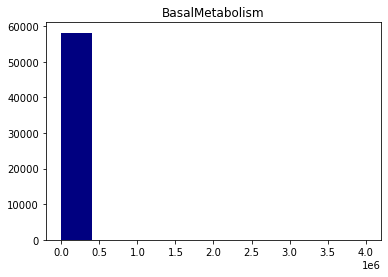

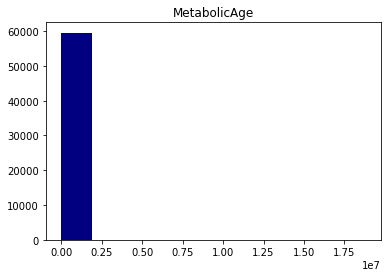


WearableData


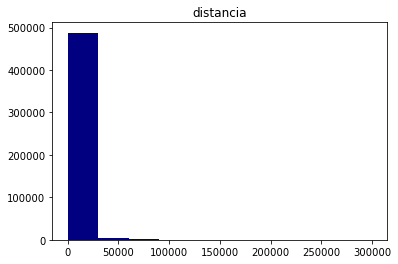

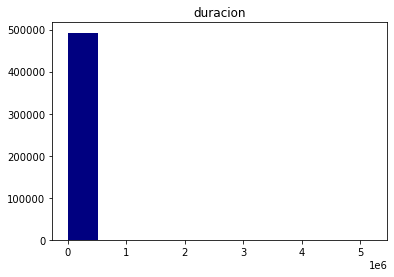

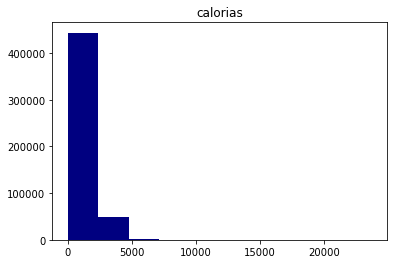

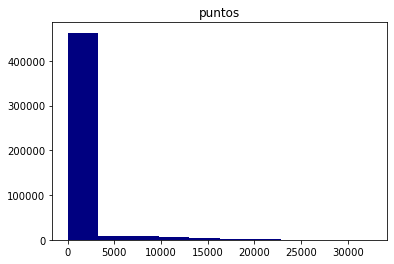

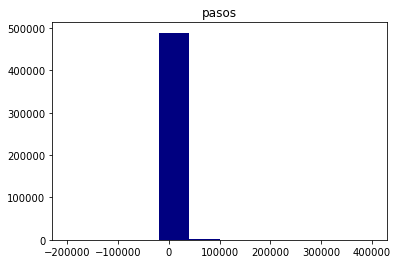

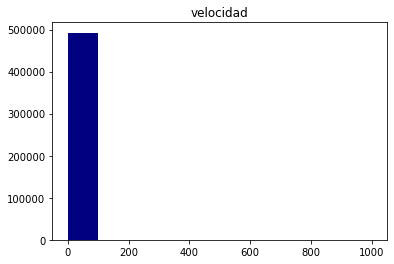

In [22]:
plot_hist(df_antropo1, columns_antropo1, 'Antropometrico1')
plot_hist(df_antropo2, columns_antropo2, 'Antropometrico2')
plot_hist(df_bodycomp, columns_bodycomp, 'BodyComposition')
plot_hist(df_wdata, columns_wdata, 'WearableData')

## Cleaning datasets

In [23]:
def plot_hist_cleaned(df, list_columns, name, remove):
    print('\n{}'.format(name))
    for column in list_columns:
        if all(df[column].isna()) is False:
            df.drop(index=df.nlargest(remove, column).index, inplace=True)
            df.drop(index=df.nsmallest(remove, column).index, inplace=True)
            plt.hist(df[column], bins = 10, range = (df[column].min(), df[column].max()),
                     color = 'green')
            plt.title(column)
            plt.show()


Antropometrico1


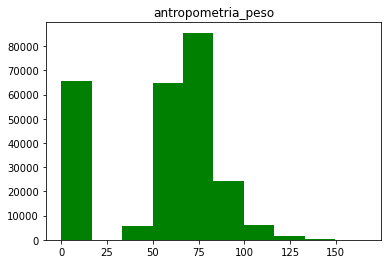

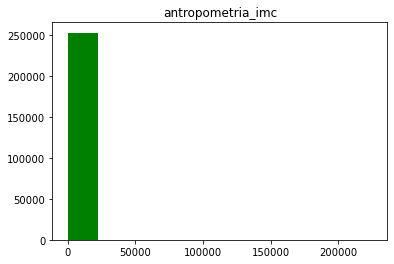

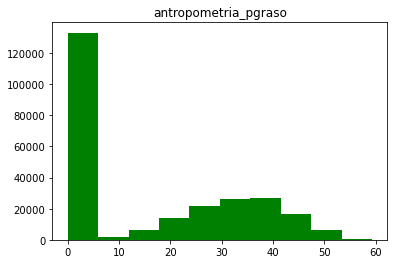

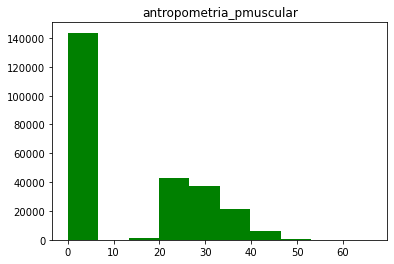

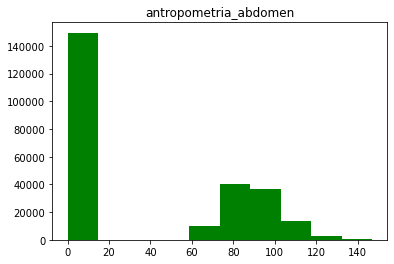

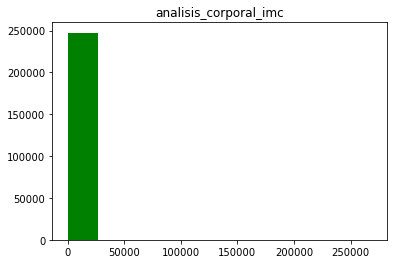

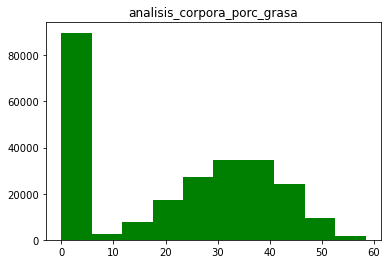

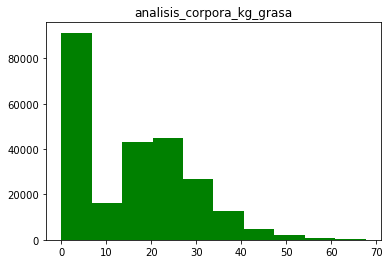

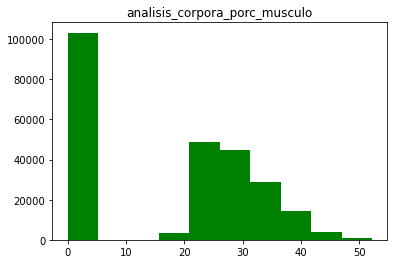

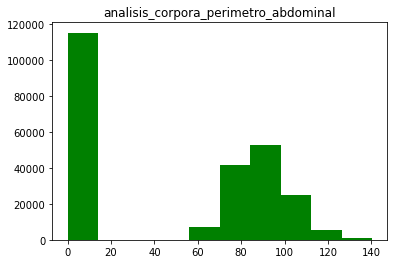

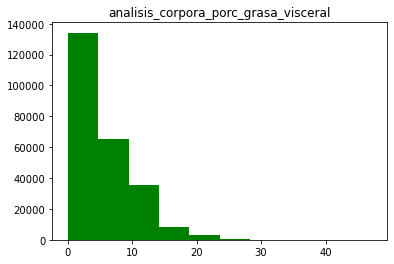

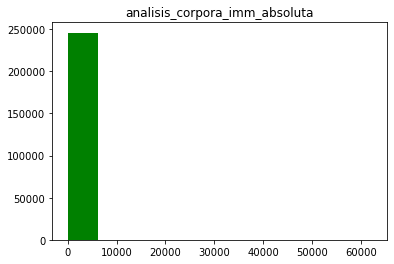

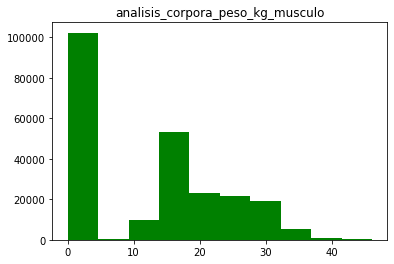


Antropometrico2


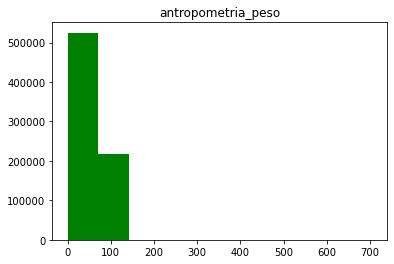

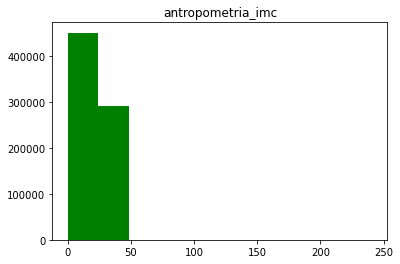

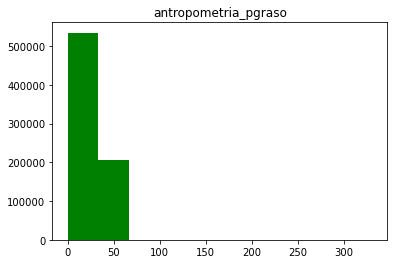

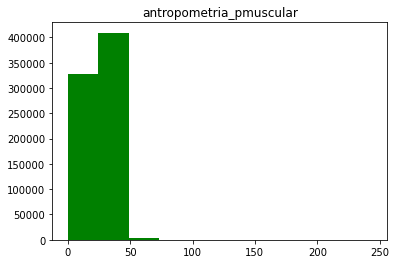

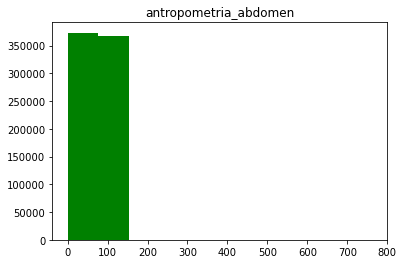

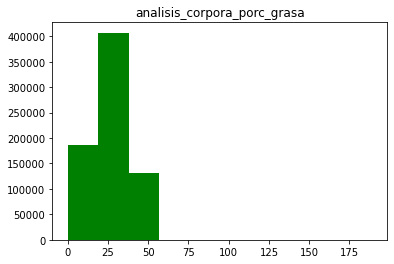

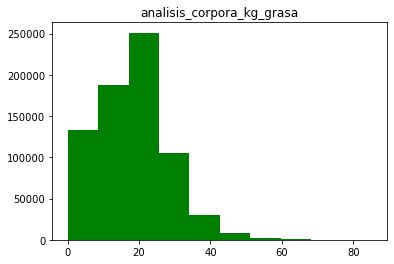

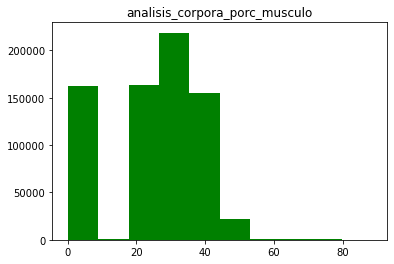

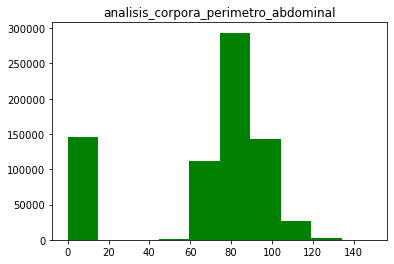

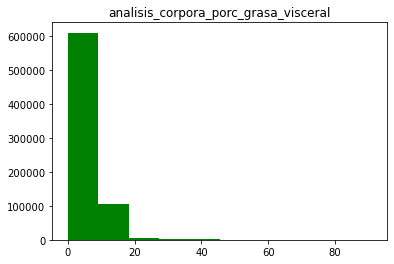

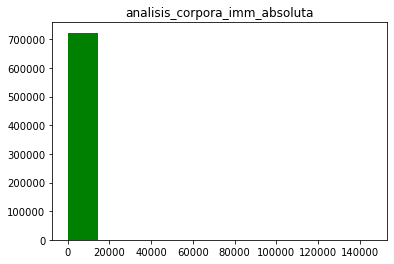

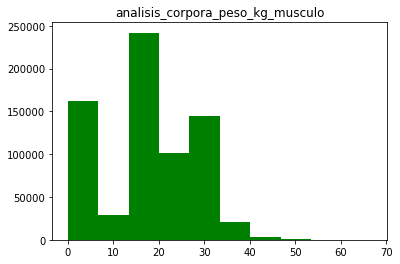


BodyComposition


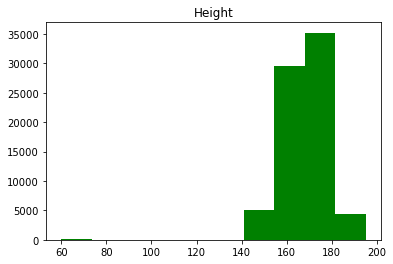

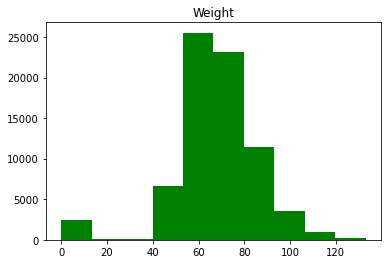

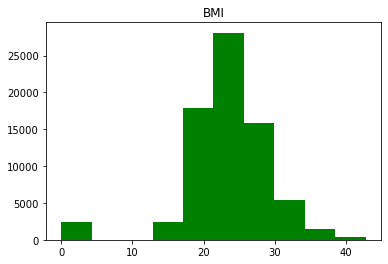

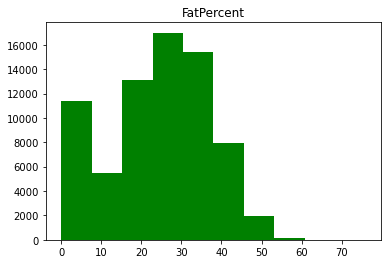

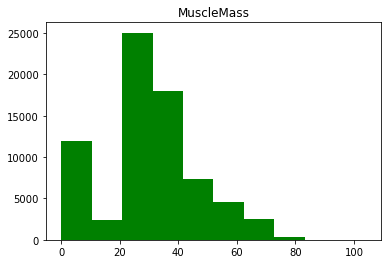

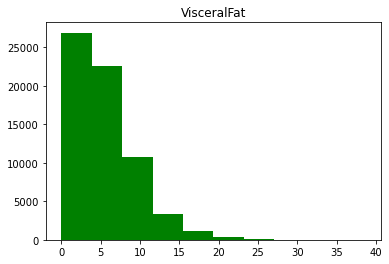

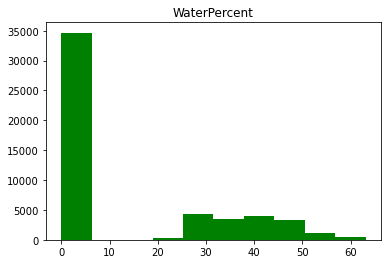

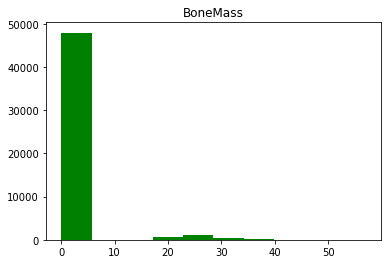

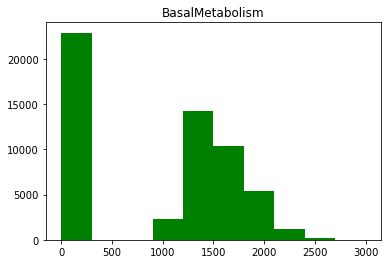

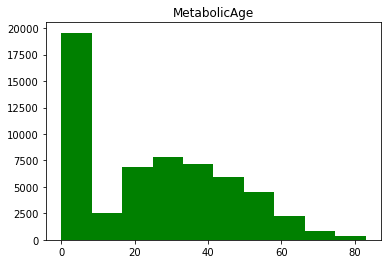


WearableData


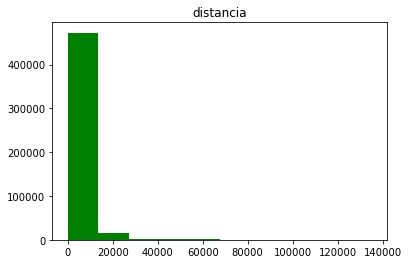

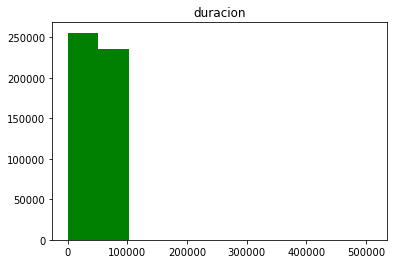

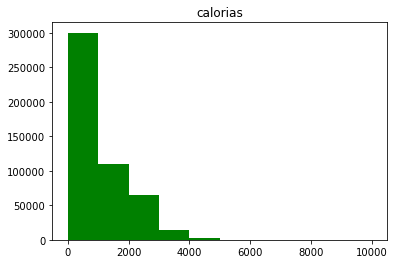

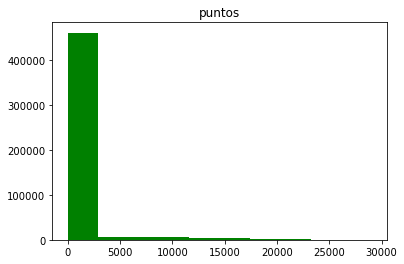

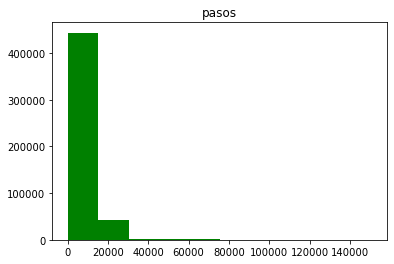

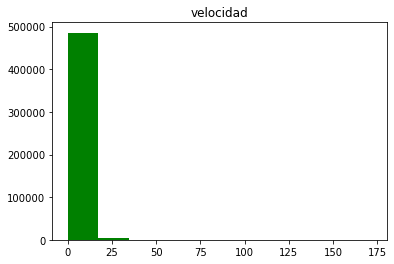

In [24]:
plot_hist_cleaned(df_antropo1, columns_antropo1, 'Antropometrico1', 100)
plot_hist_cleaned(df_antropo2, columns_antropo2, 'Antropometrico2', 100)
plot_hist_cleaned(df_bodycomp, columns_bodycomp, 'BodyComposition', 100)
plot_hist_cleaned(df_wdata, columns_wdata, 'WearableData', 100)

### Note:
A simple cleaning process that removes 100 values from the top and the bottom results better histograms.